In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from glob import glob
import IPython.display as ipd
import tensorflow as tf
from PIL import Image

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/birds/bird_songs_metadata.csv")
df.head(3)

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav


In [ ]:
class_names = df["name"].unique()
class_names

array(["Bewick's Wren", 'Northern Mockingbird', 'American Robin',
       'Song Sparrow', 'Northern Cardinal'], dtype=object)

In [ ]:
df["name"].value_counts()

Song Sparrow            1256
Northern Mockingbird    1182
Northern Cardinal       1074
American Robin          1017
Bewick's Wren            893
Name: name, dtype: int64

<BarContainer object of 5 artists>

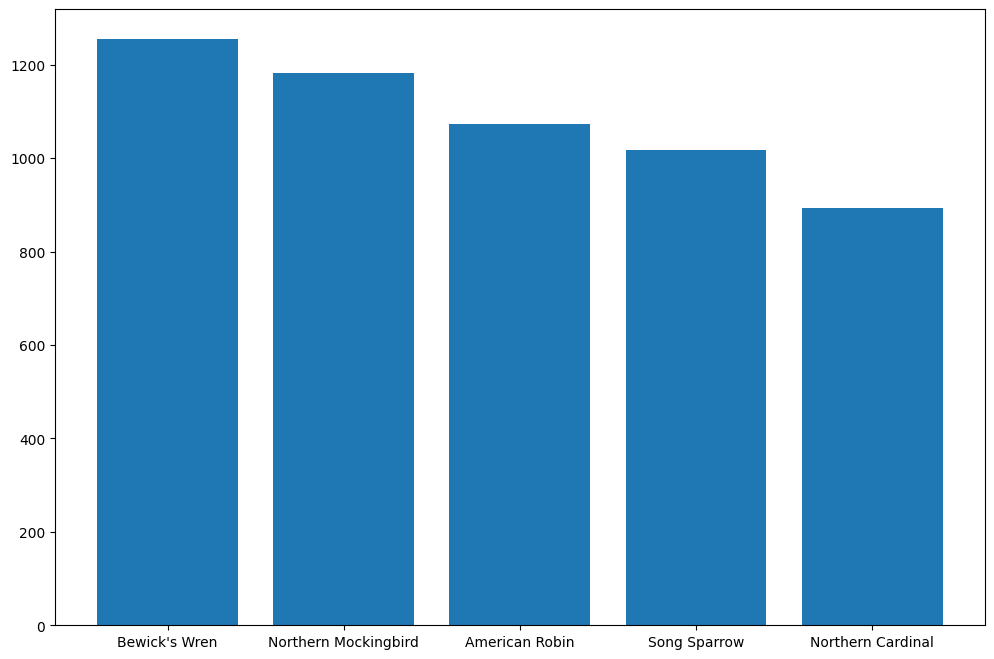

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df["name"].unique(), df["name"].value_counts())

In [ ]:
path_to_wav = "/content/drive/MyDrive/Colab Notebooks/birds/wavfiles"
datafiles = glob(path_to_wav + "*")

In [ ]:
def create_mel_spectogram(audio_file, name):
    y, sr = librosa.load(path_to_wav + audio_file)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    fig, ax = plt.subplots(figsize=(15, 5))

    ax.set_title("Mel Spec")
    plt.suptitle(name)
    librosa.display.specshow(mel_spec, x_axis='time', y_axis='log', ax=ax)
    return ipd.Audio(path_to_wav + audio_file, rate=sr)

In [ ]:
def process_audio(audio_file):
    y, sr = librosa.load(audio_file)
    mel_spec = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=40)
    mel_spec_scaled=np.mean(mel_spec.T,axis=0)
    return mel_spec_scaled

In [ ]:
df_train = pd.DataFrame({"name":df.loc[:, "name"], "audiopath": path_to_wav + "/"+df.loc[:, "filename"]})
df_train["mel_spec"] = df_train["audiopath"].apply(process_audio)
df_train["class"] = df_train["name"].factorize()[0]

In [ ]:
df_train.head(10)

,name,audiopath,mel_spec,class
0,Bewick's Wren,/content/drive/MyDrive/Colab Notebooks/birds/w...,"[-132.85225, 81.1399, 17.018223, 54.974297, -1...",0
1,Bewick's Wren,/content/drive/MyDrive/Colab Notebooks/birds/w...,"[-147.74393, 99.42544, 20.885643, 44.118813, 1...",0
2,Bewick's Wren,/content/drive/MyDrive/Colab Notebooks/birds/w...,"[-92.42778, 84.10635, 17.362778, 53.86046, -8....",0
3,Bewick's Wren,/content/drive/MyDrive/Colab Notebooks/birds/w...,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",0
4,Bewick's Wren,/content/drive/MyDrive/Colab Notebooks/birds/w...,"[-107.95914, 92.416, 17.773256, 43.13245, -1.8...",0
5,Bewick's Wren,/content/drive/MyDrive/Colab Notebooks/birds/w...,"[-141.21455, 72.80629, 12.670303, 56.663185, -...",0
6,Bewick's Wren,/content/drive/MyDrive/Colab Notebooks/birds/w...,"[-159.82341, 86.14374, 14.684344, 41.627968, -...",0
7,Bewick's Wren,/content/drive/MyDrive/Colab Notebooks/birds/w...,"[-125.60996, 61.700966, 8.613693, 56.77733, -1...",0
8,Bewick's Wren,/content/drive/MyDrive/Colab Notebooks/birds/w...,"[-127.9895, 67.526306, 6.4566174, 55.534534, -...",0
9,Bewick's Wren,/content/drive/MyDrive/Colab Notebooks/birds/w...,"[-144.72055, 81.81318, 9.465525, 40.918465, -1...",0


In [ ]:
extracted_features_df=pd.DataFrame(df_train,columns=['name','mel_spec'])
extracted_features_df.head()
extracted_features_df.shape

(5422, 2)

In [ ]:
extracted_features_df.head()

,name,mel_spec
0,Bewick's Wren,"[-132.85225, 81.1399, 17.018223, 54.974297, -1..."
1,Bewick's Wren,"[-147.74393, 99.42544, 20.885643, 44.118813, 1..."
2,Bewick's Wren,"[-92.42778, 84.10635, 17.362778, 53.86046, -8...."
3,Bewick's Wren,"[-93.07557, 81.17431, 16.225544, 52.08842, -8...."
4,Bewick's Wren,"[-107.95914, 92.416, 17.773256, 43.13245, -1.8..."


In [ ]:
extracted_features_df.shape

(5422, 2)

In [ ]:
X=np.array(extracted_features_df['mel_spec'].tolist())
y=np.array(extracted_features_df['name'].tolist())

In [ ]:
X.shape

(5422, 40)

In [ ]:
y.shape

(5422,)

In [ ]:
X

array([[-1.3285225e+02,  8.1139900e+01,  1.7018223e+01, ...,
        -8.0229342e-01, -4.6149001e+00, -7.0749331e-01],
       [-1.4774393e+02,  9.9425438e+01,  2.0885643e+01, ...,
        -9.3192911e-01, -5.0233979e+00, -1.2252684e+00],
       [-9.2427780e+01,  8.4106354e+01,  1.7362778e+01, ...,
        -1.5095264e+00, -3.3417706e+00, -4.9797130e-01],
       ...,
       [-2.2850348e+02,  9.5049114e+00, -8.2236824e+01, ...,
         1.6712842e+00,  1.7382443e-01,  1.2488134e+00],
       [-2.2264116e+02,  1.3234480e+01, -7.7964081e+01, ...,
        -1.4348578e+00,  1.0511127e+00,  2.7732670e+00],
       [-2.5670840e+02,  3.9117985e+01, -7.0265968e+01, ...,
        -2.0391259e+00,  9.7111009e-02,  2.6738038e+00]], dtype=float32)

In [ ]:
y

array(["Bewick's Wren", "Bewick's Wren", "Bewick's Wren", ...,
       'Northern Cardinal', 'Northern Cardinal', 'Northern Cardinal'],
      dtype='<U20')

In [ ]:
y=np.array(pd.get_dummies(y))


In [ ]:
y

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-271.31616   ,  -26.419065  ,  -63.76474   , ...,    2.588676  ,
          -3.9820173 ,    5.081394  ],
       [-401.3699    ,  -31.111538  ,  -92.24524   , ...,   -2.9093552 ,
          -0.48502737,    1.7998823 ],
       [-366.7505    ,   -3.916123  , -118.17853   , ...,   -2.0479555 ,
           1.2964002 ,    0.82310003],
       ...,
       [ -63.003605  ,   88.03719   ,  -30.778547  , ...,   -1.3984175 ,
          -1.852705  ,   -1.1443155 ],
       [-361.90756   ,   30.67692   ,  -64.73752   , ...,   -1.6385154 ,
          -0.99096596,   -0.40422422],
       [-168.7206    ,    1.3105384 ,  -65.46302   , ...,    2.268755  ,
          -1.4256755 ,   -2.3499906 ]], dtype=float32)

In [ ]:
y

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
X_train.shape

(4337, 40)

In [ ]:
X_test.shape

(1085, 40)

In [ ]:
y_train.shape

(4337, 5)

In [ ]:
y_test.shape

(1085, 5)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(5))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4100      
                                                                 
 activation_8 (Activation)   (None, 100)               0         
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 200)               20200     
                                                                 
 activation_9 (Activation)   (None, 200)               0         
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
import pickle
import librosa
import numpy as np
num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
pickle.dump(model, open('ann_model.pkl', 'wb'))
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
128/136 [===========================>..] - ETA: 0s - loss: 13.0934 - accuracy: 0.2170
Epoch 1: val_loss improved from inf to 1.58581, saving model to saved_models/audio_classification.hdf5
136/136 [==============================] - 2s 7ms/step - loss: 12.6042 - accuracy: 0.2184 - val_loss: 1.5858 - val_accuracy: 0.2452
Epoch 2/100
 28/136 [=====>........................] - ETA: 0s - loss: 3.7152 - accuracy: 0.2254

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


126/136 [==========================>...] - ETA: 0s - loss: 2.7957 - accuracy: 0.2312
Epoch 2: val_loss did not improve from 1.58581
136/136 [==============================] - 1s 5ms/step - loss: 2.7441 - accuracy: 0.2326 - val_loss: 1.6083 - val_accuracy: 0.2184
Epoch 3/100
132/136 [============================>.] - ETA: 0s - loss: 1.8704 - accuracy: 0.2313
Epoch 3: val_loss did not improve from 1.58581
136/136 [==============================] - 0s 3ms/step - loss: 1.8681 - accuracy: 0.2303 - val_loss: 1.6054 - val_accuracy: 0.2258
Epoch 4/100
131/136 [===========================>..] - ETA: 0s - loss: 1.6778 - accuracy: 0.2462
Epoch 4: val_loss did not improve from 1.58581
136/136 [==============================] - 0s 3ms/step - loss: 1.6779 - accuracy: 0.2456 - val_loss: 1.6017 - val_accuracy: 0.2479
Epoch 5/100
121/136 [=========================>....] - ETA: 0s - loss: 1.6590 - accuracy: 0.2404
Epoch 5: val_loss did not improve from 1.58581
136/136 [==============================] - 

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8423963189125061


In [ ]:
X_test[1]

array([-189.45573  ,   62.150654 ,   19.43638  ,   55.768246 ,
         22.014147 ,    1.1670706,   10.744263 ,   25.974312 ,
          4.4643216,    7.8037286,    9.627176 ,   13.46692  ,
          0.99146  ,    5.4443765,    1.2118229,    5.956566 ,
         -3.0814357,    2.580064 ,   -1.0993098,    3.641694 ,
         -4.4661713,    0.746521 ,   -1.9080472,    1.6144162,
         -4.795732 ,    0.726896 ,   -2.5761786,    3.1347125,
         -2.5605633,    1.7595351,   -1.1499922,    3.5236385,
         -2.869519 ,    3.5089357,   -0.5358302,    0.9323693,
         -1.6913214,    4.6088724,   -0.9242106,    1.7950323],
      dtype=float32)

In [ ]:
model.predict(X_test)

34/34 [==============================] - 0s 2ms/step


array([[8.6615910e-04, 7.3971685e-05, 8.0850762e-01, 1.9034834e-01,
        2.0397746e-04],
       [4.8949134e-01, 1.1811443e-02, 9.7458977e-03, 4.6361491e-01,
        2.5336262e-02],
       [7.4310005e-01, 1.4305592e-06, 1.2101286e-05, 2.5687850e-01,
        7.7560799e-06],
       ...,
       [8.1533723e-02, 2.1897180e-01, 1.6694063e-01, 8.4189855e-02,
        4.4836399e-01],
       [8.4789932e-01, 6.1732905e-08, 1.2110538e-06, 1.5209857e-01,
        7.9798201e-07],
       [9.0458440e-03, 2.9593803e-02, 8.2552242e-01, 9.8437525e-02,
        3.7400372e-02]], dtype=float32)

In [ ]:
from datetime import datetime
import pickle
import librosa
import numpy as np
start = datetime.now()
# Load the trained ANN model from a file
model = pickle.load(open('ann_model.pkl', 'rb'))
filename="/content/drive/MyDrive/Colab Notebooks/birds/wavfiles/557838-4.wav"

audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')

# Extract MFCC features from the audio
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape the features into a 1D array
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Make a prediction on the bird sound
y_pred = model.predict(mfccs_scaled_features)

# Get the predicted class label
predicted_class = np.argmax(y_pred)

# Print the predicted class label
print('Predicted class:', predicted_class)
duration = datetime.now() - start
print("Training completed in time: ", duration)

1/1 [==============================] - 0s 87ms/step
Predicted class: 1
Training completed in time:  0:00:00.313020


ACCURACY = 83%